### Importing Necessary Libraries

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import *
import requests
from sklearn.utils import resample
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,roc_auc_score, roc_curve, confusion_matrix,
                             ConfusionMatrixDisplay, classification_report)
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

### Taking a peek at our data

In [168]:
df=pd.read_csv('INNHotelsGroup.csv')
df

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
2            Room_Type 1          1          2018              2   
3            Room_Type 1        211          2018              5   
4            Room_Type 1         48          2018              4   
...                  ...        ...           ...            ...   
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
2                28              Online               0   
3                20              Online               0   
4                11              Online               0   
...             ...                 ...             ...   
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
36270                             0                                     0   
36271                             0                                     0   
36272                            

In [169]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [171]:
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

In [172]:
df.describe(exclude=np.number).T

count unique           top   freq
Booking_ID           36275  36275      INN00001      1
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

### Univariate Analysis

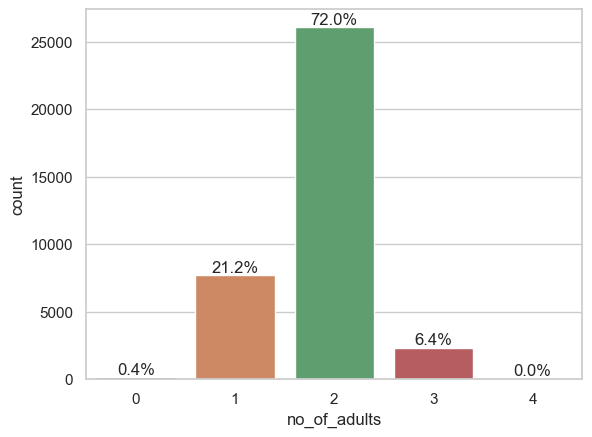

In [173]:
fig=sns.countplot(df,x='no_of_adults')
total = len(df)
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

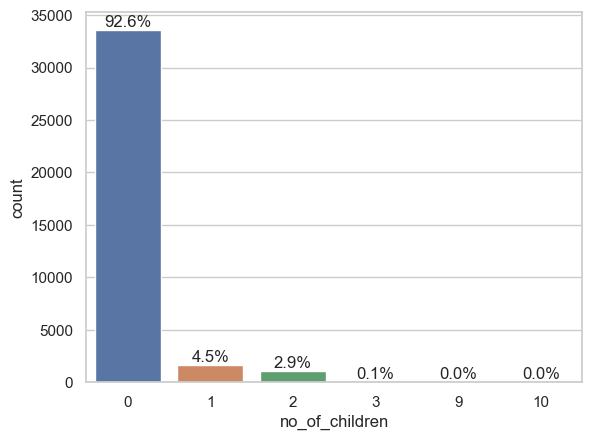

In [174]:
fig=sns.countplot(df,x='no_of_children')
total = len(df)
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

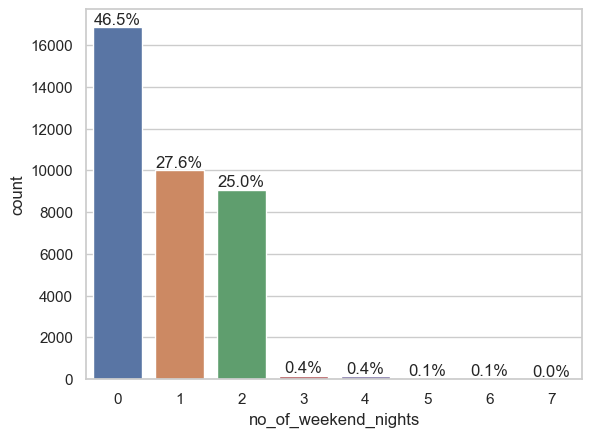

In [175]:
fig=sns.countplot(df,x='no_of_weekend_nights')
total = len(df)
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

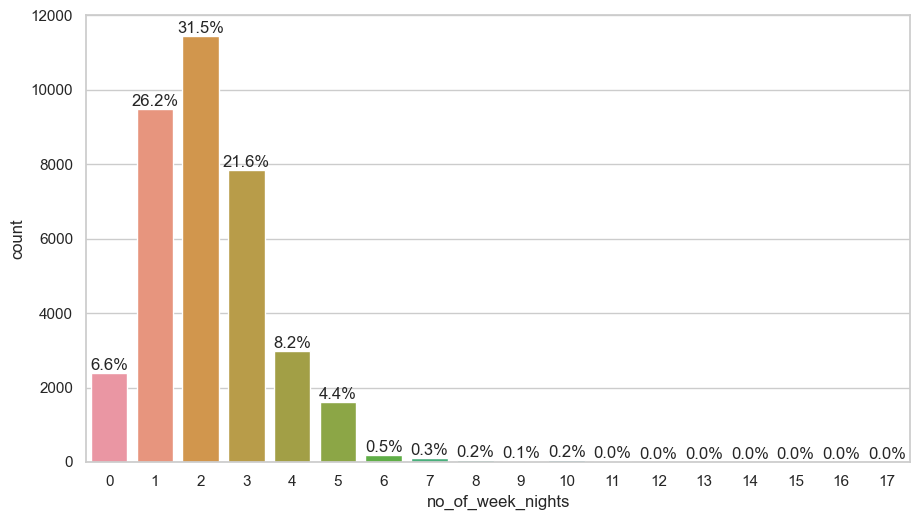

In [176]:
plt.figure(figsize=(10,6))
fig=sns.countplot(df,x='no_of_week_nights')
total = len(df)
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig.annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout(pad=3.0)
plt.show()


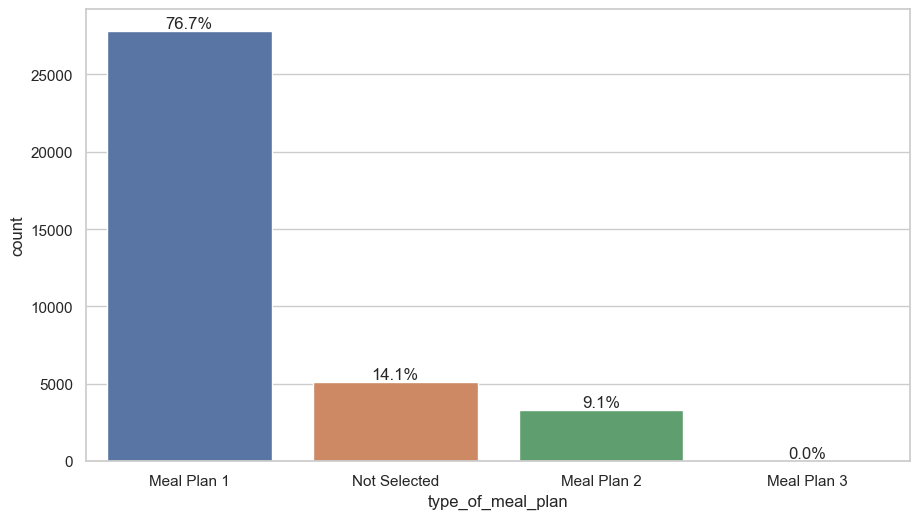

In [177]:
plt.figure(figsize=(10,6))
fig=sns.countplot(df,x='type_of_meal_plan')
total = len(df)
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig.annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout(pad=3.0)
plt.show()


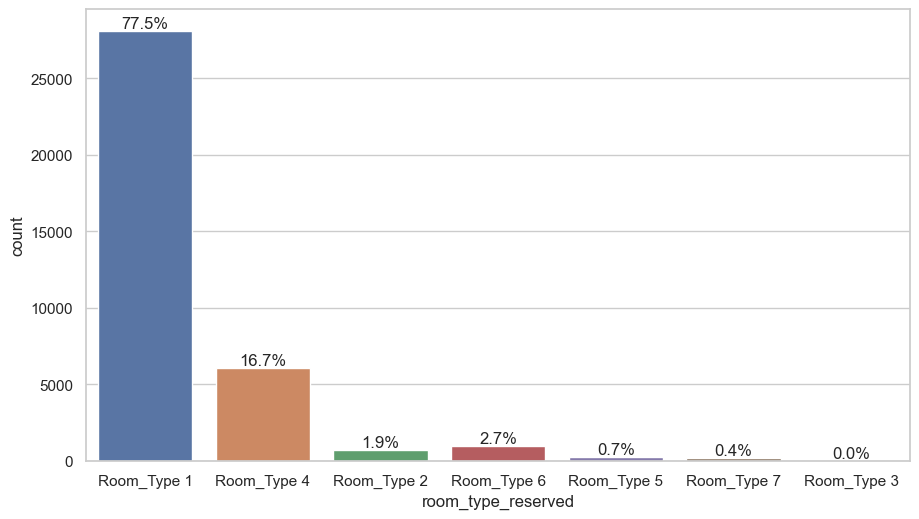

In [178]:
plt.figure(figsize=(10,6))
fig=sns.countplot(df,x='room_type_reserved')
total = len(df)
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig.annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout(pad=3.0)
plt.show()


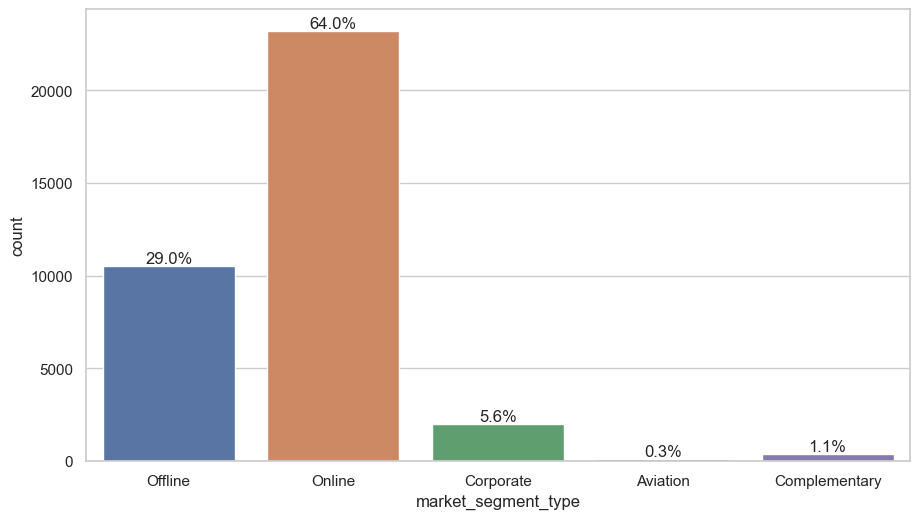

In [179]:
plt.figure(figsize=(10,6))
fig=sns.countplot(df,x='market_segment_type')
total = len(df)
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig.annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout(pad=3.0)
plt.show()

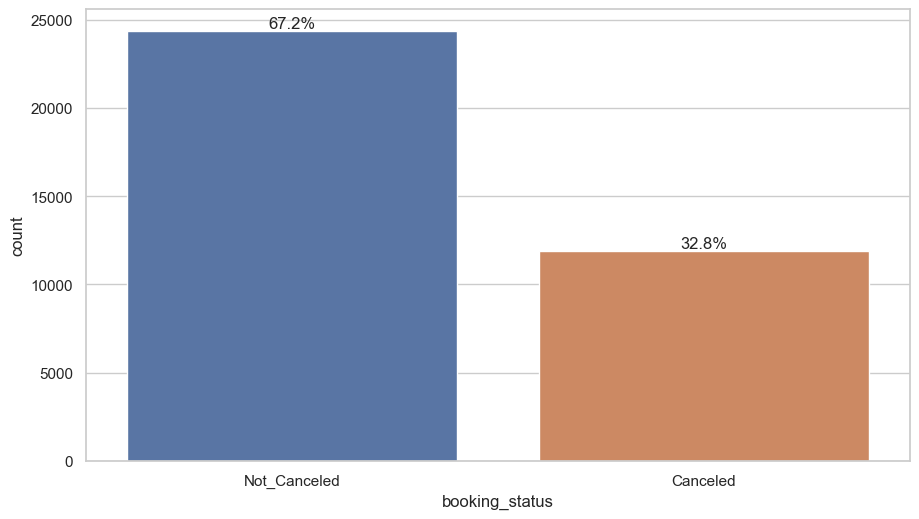

In [180]:
plt.figure(figsize=(10,6))
fig=sns.countplot(df,x='booking_status')
total = len(df)
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig.annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout(pad=3.0)
plt.show()

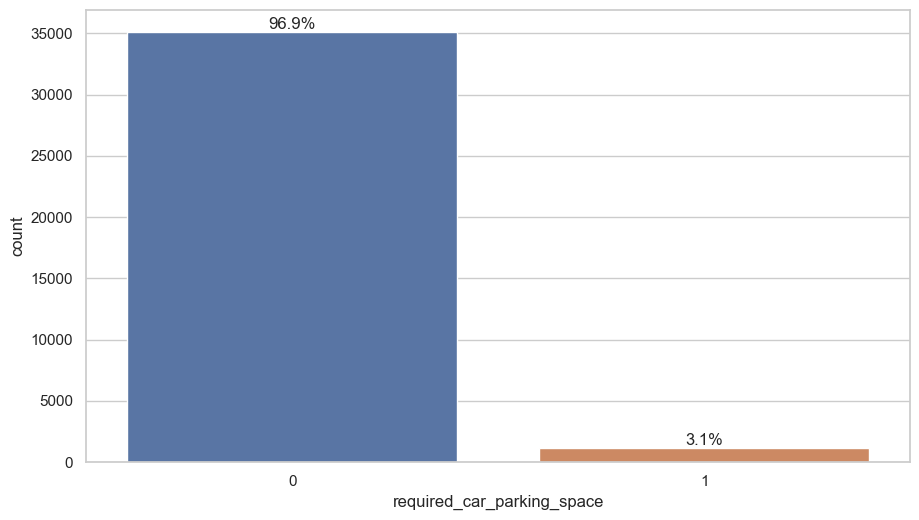

In [181]:
plt.figure(figsize=(10,6))
fig=sns.countplot(df,x='required_car_parking_space')
total = len(df)
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig.annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout(pad=3.0)
plt.show()

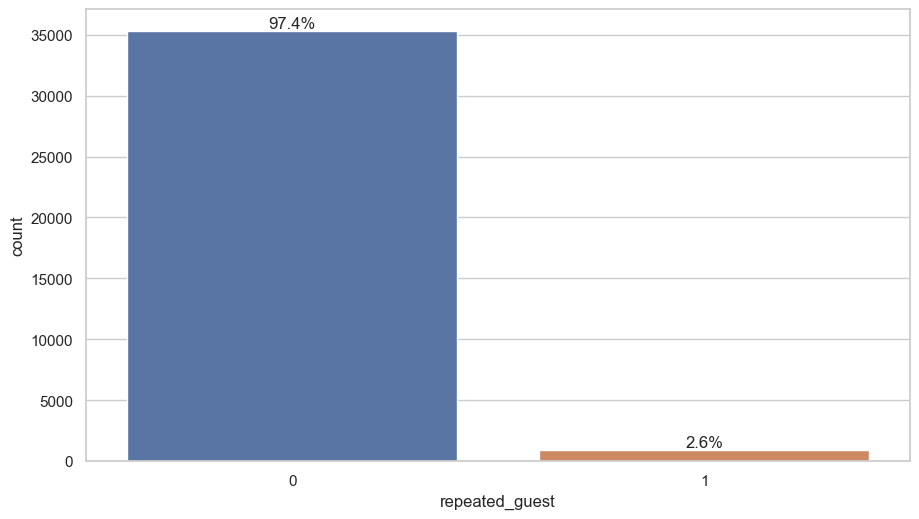

In [182]:
plt.figure(figsize=(10,6))
fig=sns.countplot(df,x='repeated_guest')
total = len(df)
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig.annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout(pad=3.0)
plt.show()

In [183]:
df.arrival_year.min(),df.arrival_year.max()

(2017, 2018)

<Axes: xlabel='lead_time', ylabel='Count'>

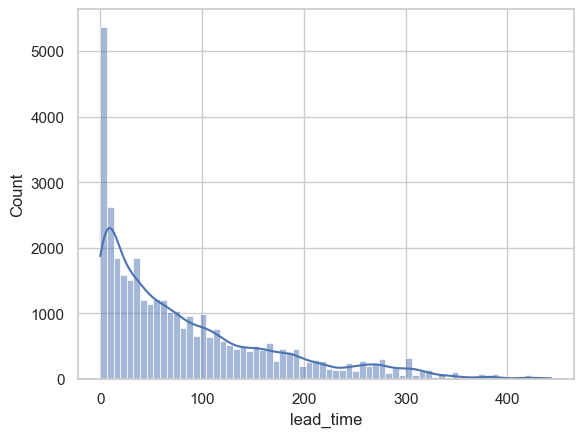

In [184]:
sns.histplot(df,x='lead_time',kde=True)

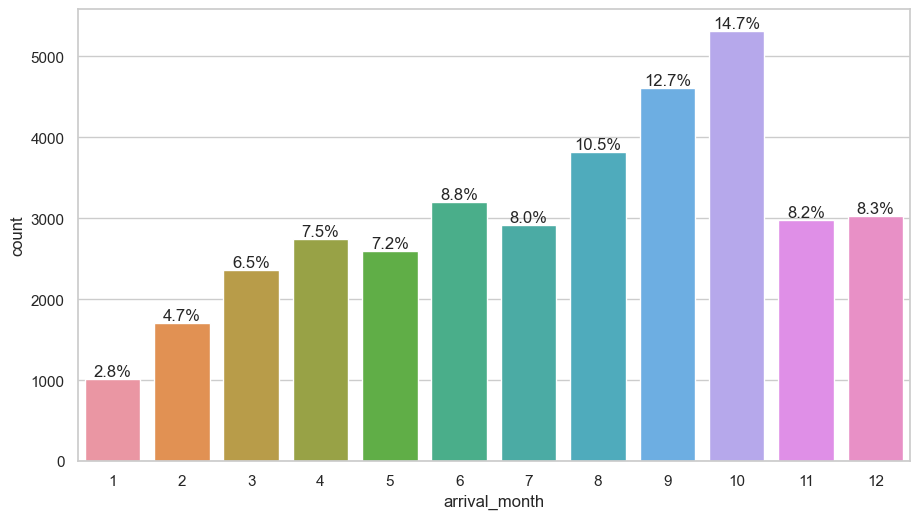

In [185]:
plt.figure(figsize=(10,6))
fig=sns.countplot(df,x='arrival_month')
total = len(df)
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig.annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout(pad=3.0)
plt.show()

<Axes: xlabel='avg_price_per_room', ylabel='Count'>

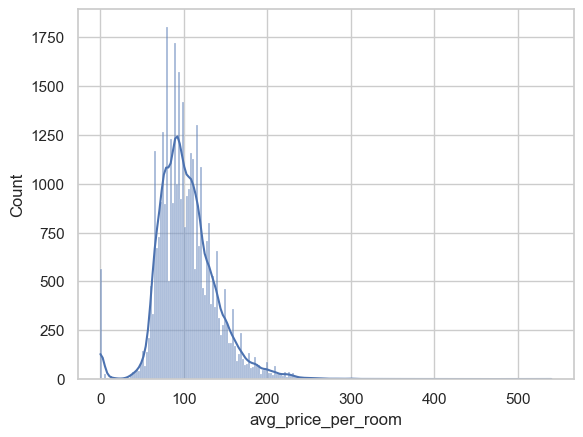

In [186]:
sns.histplot(df,x='avg_price_per_room',kde=True)

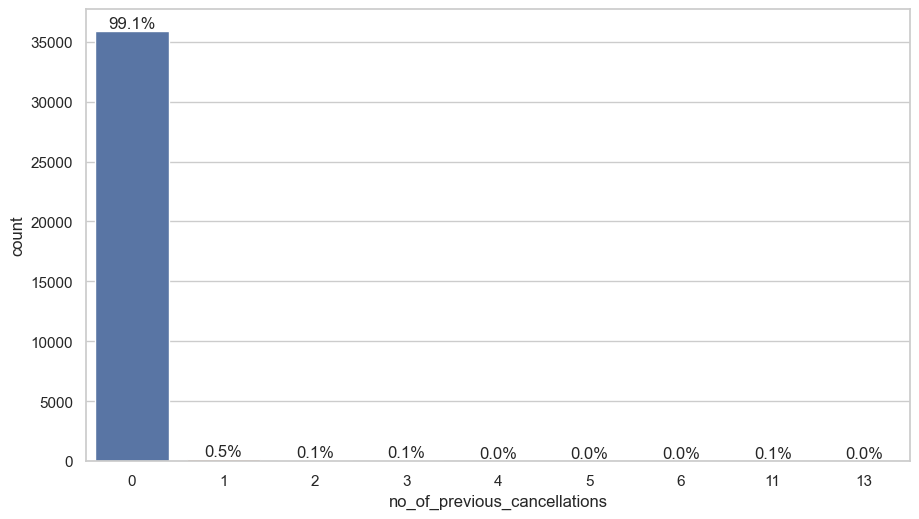

In [187]:
plt.figure(figsize=(10,6))
fig=sns.countplot(df,x='no_of_previous_cancellations')
total = len(df)
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig.annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout(pad=3.0)
plt.show()

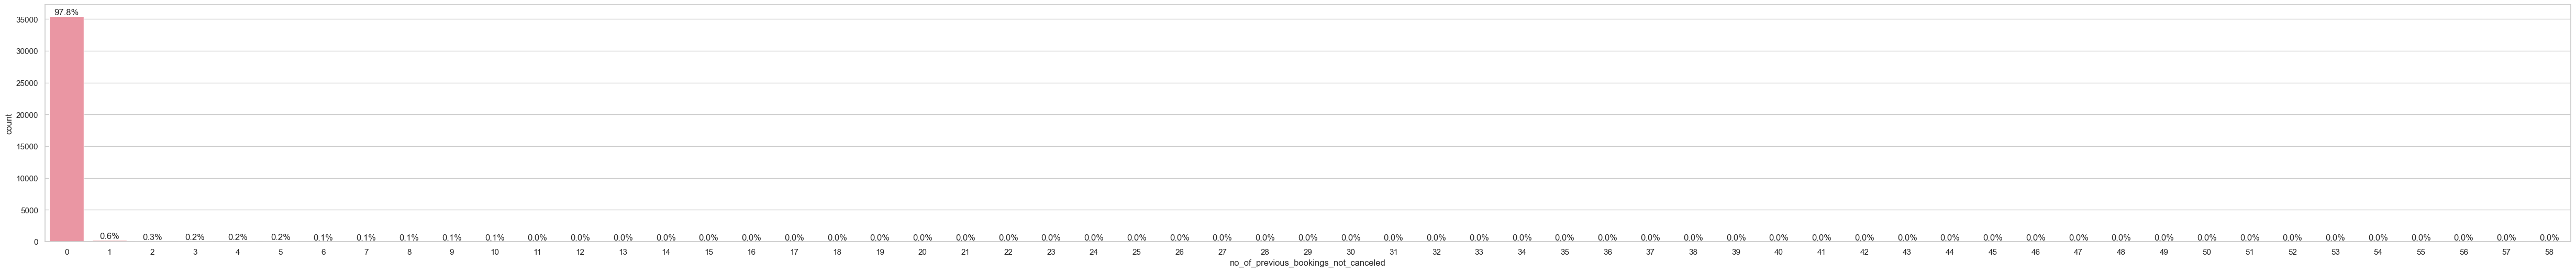

In [188]:
plt.figure(figsize=(50,6))
fig=sns.countplot(df,x='no_of_previous_bookings_not_canceled')
total = len(df)
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig.annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout(pad=3.0)
plt.show()

### Bivariate Analysis

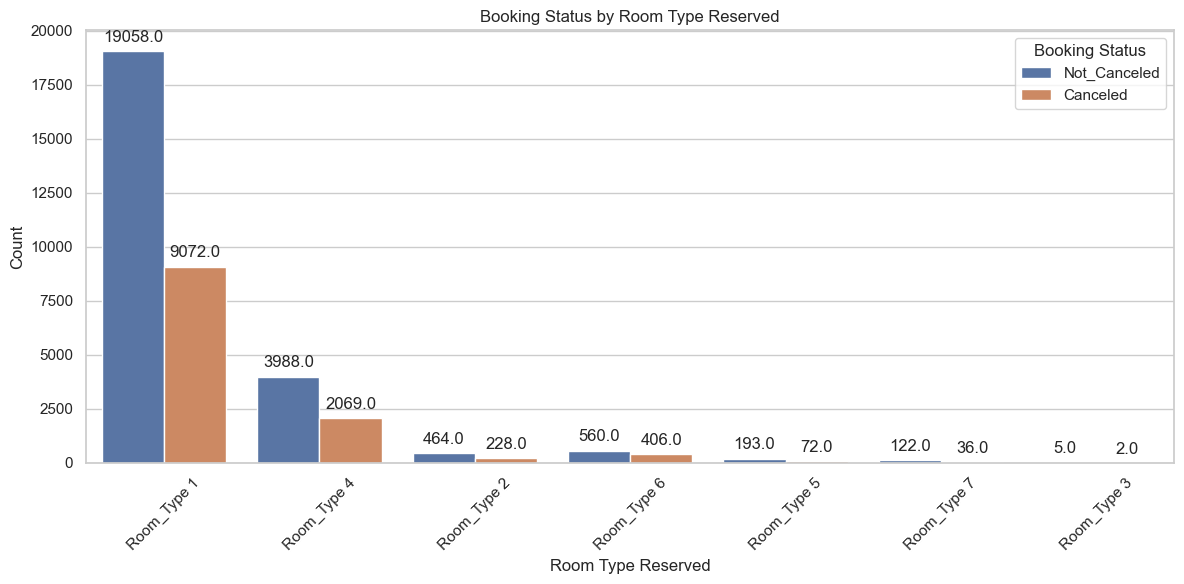

In [189]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='room_type_reserved', hue='booking_status', data=df)
plt.title('Booking Status by Room Type Reserved')
plt.xlabel('Room Type Reserved')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.xticks(rotation=45)
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()



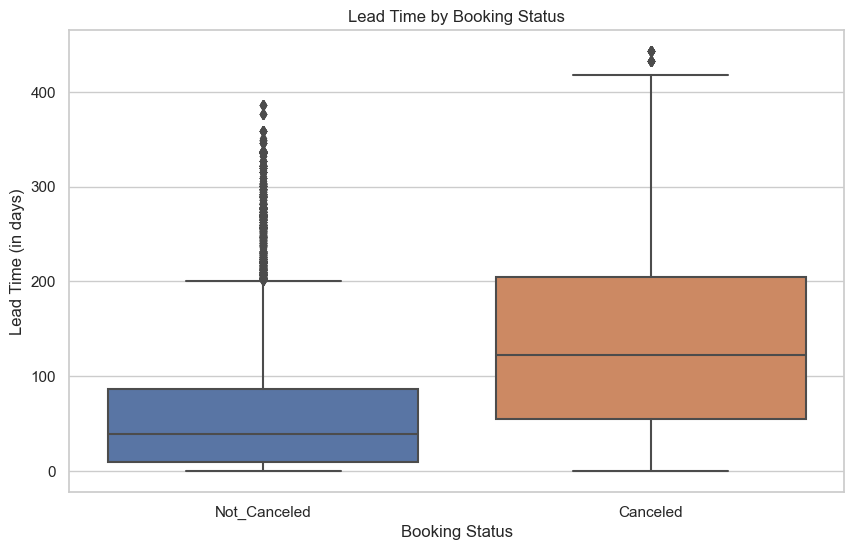

In [191]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='lead_time', data=df)
plt.title('Lead Time by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time (in days)')
plt.show()

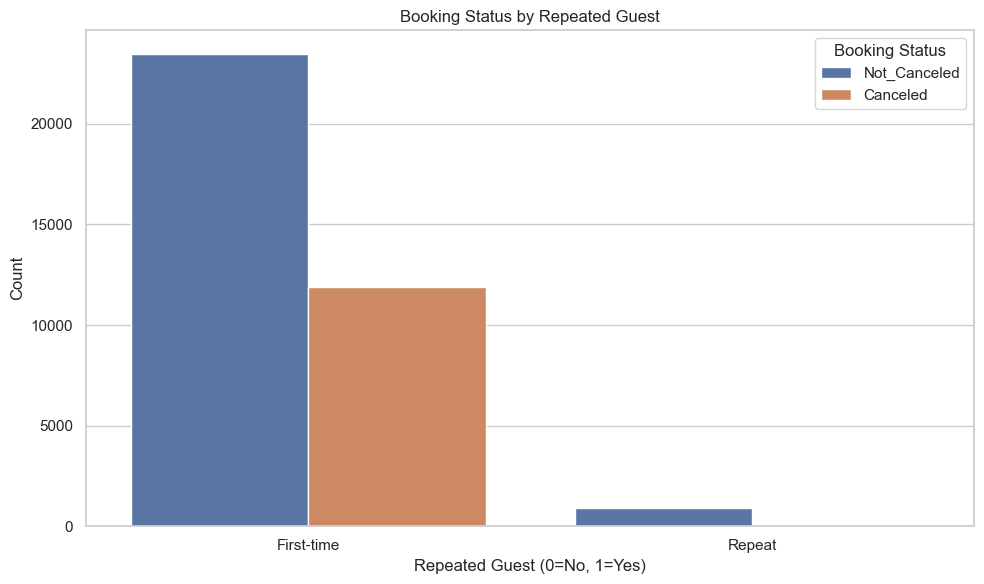

In [192]:
plt.figure(figsize=(10, 6))
sns.countplot(x='repeated_guest', hue='booking_status', data=df)
plt.title('Booking Status by Repeated Guest')
plt.xlabel('Repeated Guest (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.xticks([0, 1], ['First-time', 'Repeat'])
plt.tight_layout()
plt.show()

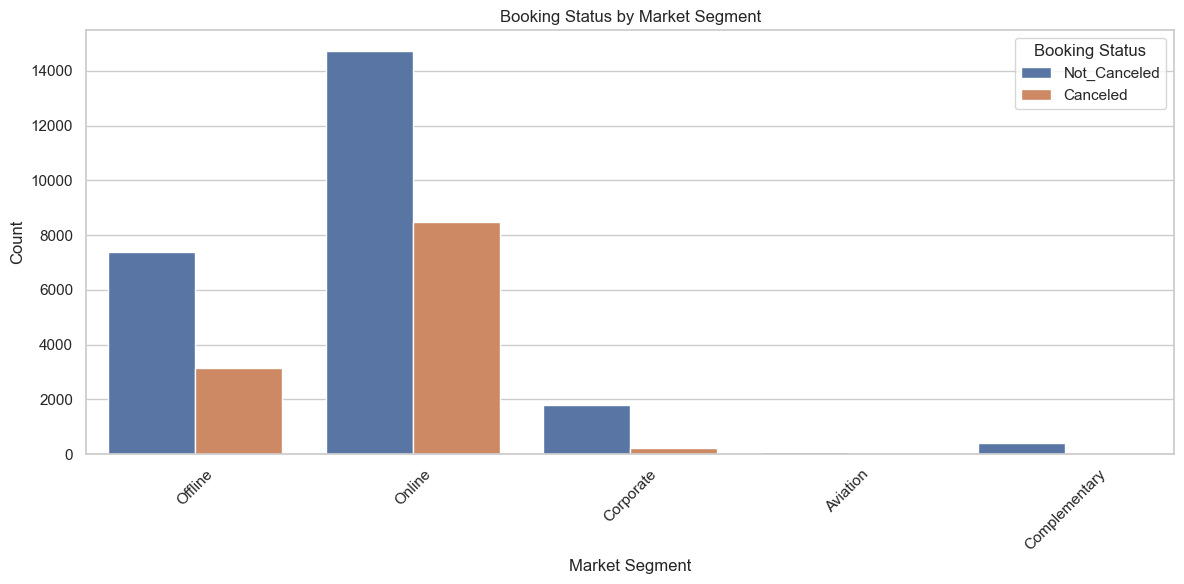

In [193]:
plt.figure(figsize=(12, 6))
sns.countplot(x='market_segment_type', hue='booking_status', data=df)
plt.title('Booking Status by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


<Figure size 1200x600 with 0 Axes>

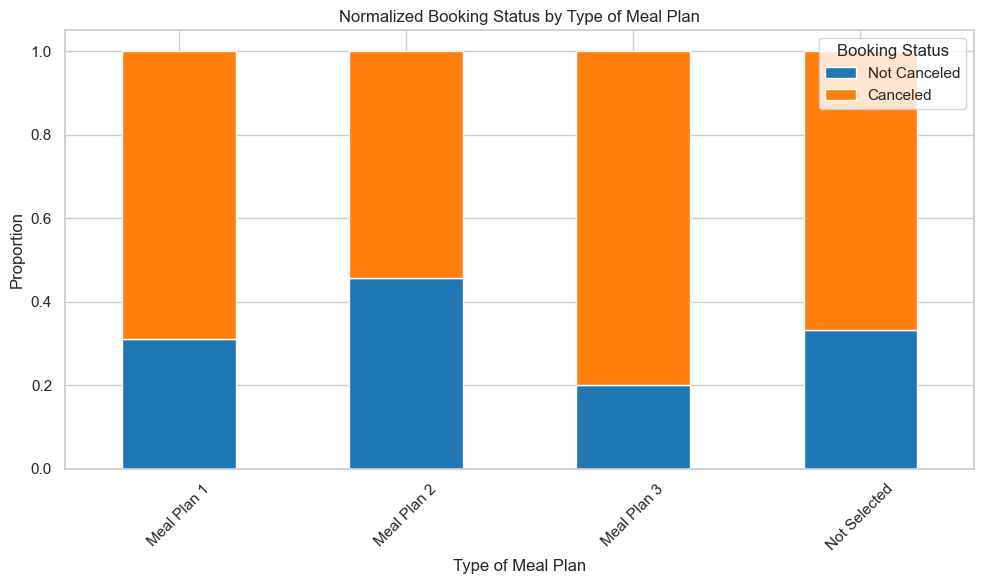

In [194]:

plt.figure(figsize=(12, 6))
meal_plan_proportions = (df.groupby(['type_of_meal_plan'])['booking_status']
                         .value_counts(normalize=True)
                         .unstack()
                         .fillna(0))

meal_plan_proportions.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(10, 6))
plt.title('Normalized Booking Status by Type of Meal Plan')
plt.xlabel('Type of Meal Plan')
plt.ylabel('Proportion')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


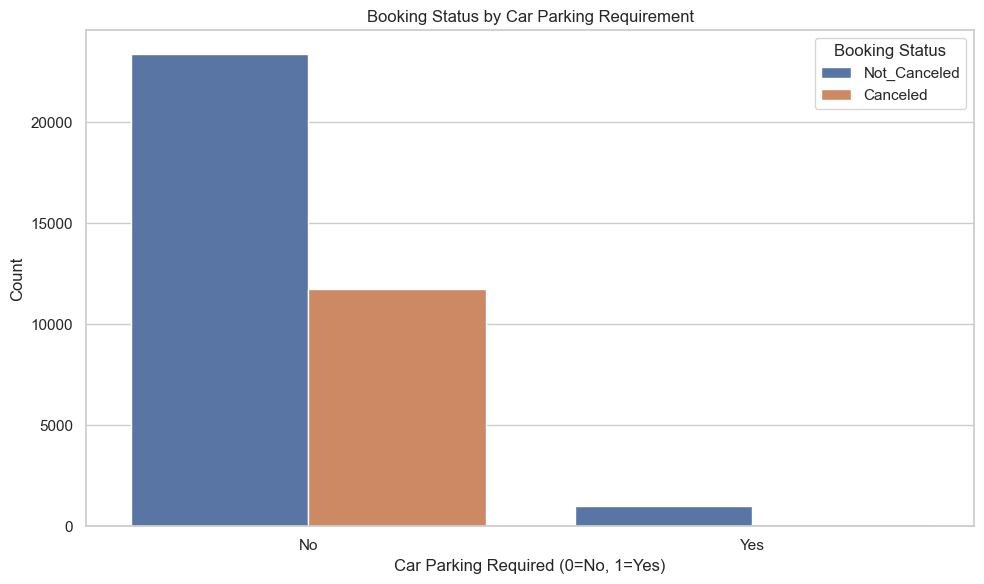

In [195]:
plt.figure(figsize=(10, 6))
sns.countplot(x='required_car_parking_space', hue='booking_status', data=df)
plt.title('Booking Status by Car Parking Requirement')
plt.xlabel('Car Parking Required (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()

plt.show()


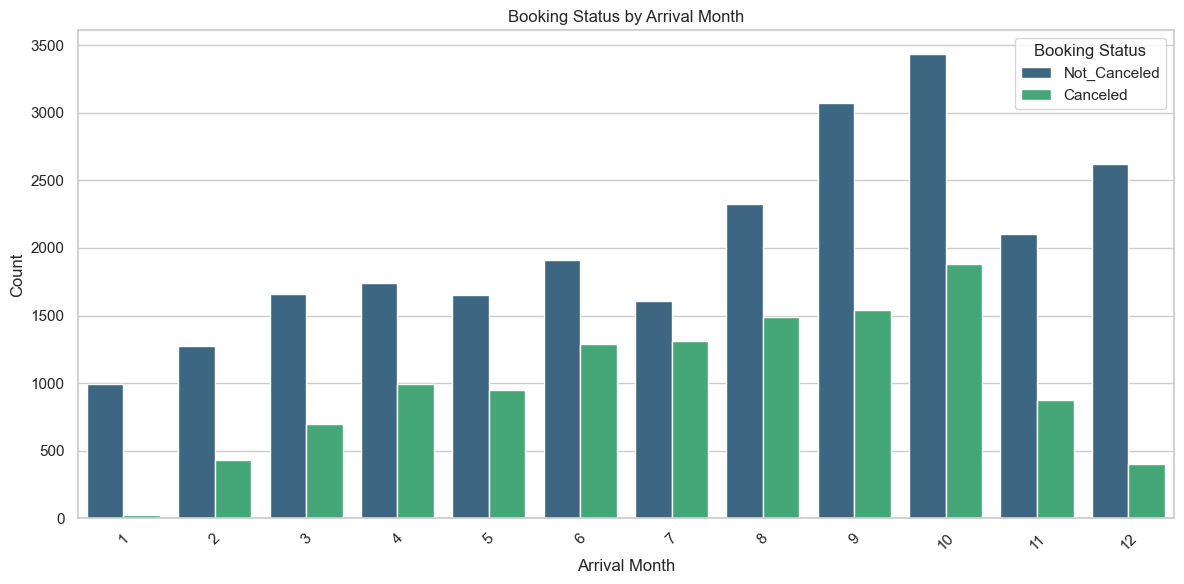

In [196]:
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_month', hue='booking_status', data=df, palette='viridis')
plt.title('Booking Status by Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()


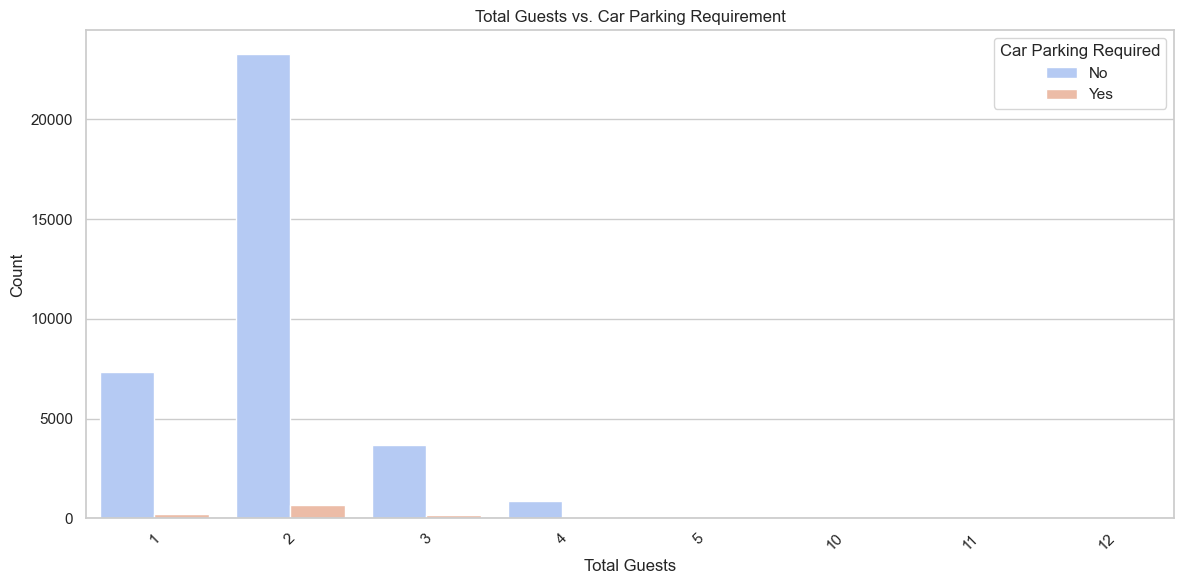

In [197]:

df['total_guests'] = df['no_of_adults'] + df['no_of_children']

plt.figure(figsize=(12, 6))
sns.countplot(x='total_guests', hue='required_car_parking_space', data=df, palette='coolwarm')
plt.title('Total Guests vs. Car Parking Requirement')
plt.xlabel('Total Guests')
plt.ylabel('Count')
plt.legend(title='Car Parking Required', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


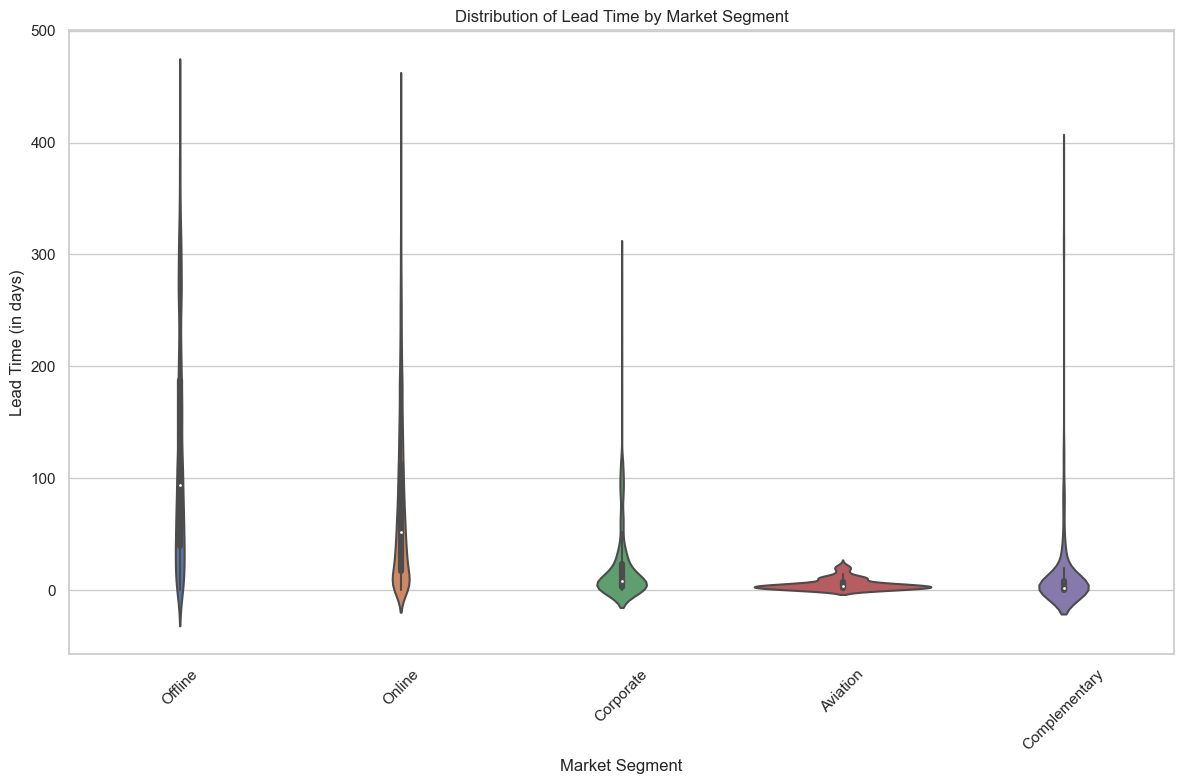

In [198]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='market_segment_type', y='lead_time', data=df)
plt.title('Distribution of Lead Time by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Lead Time (in days)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


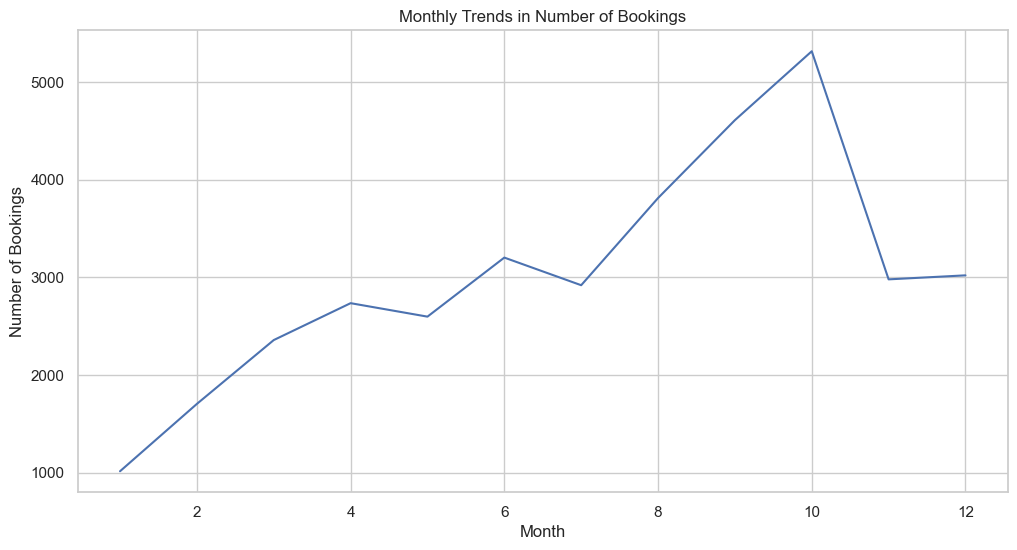

In [200]:
plt.figure(figsize=(12, 6))
monthly_bookings = df.groupby('arrival_month')['Booking_ID'].count()
sns.lineplot(data=monthly_bookings)
plt.title('Monthly Trends in Number of Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()


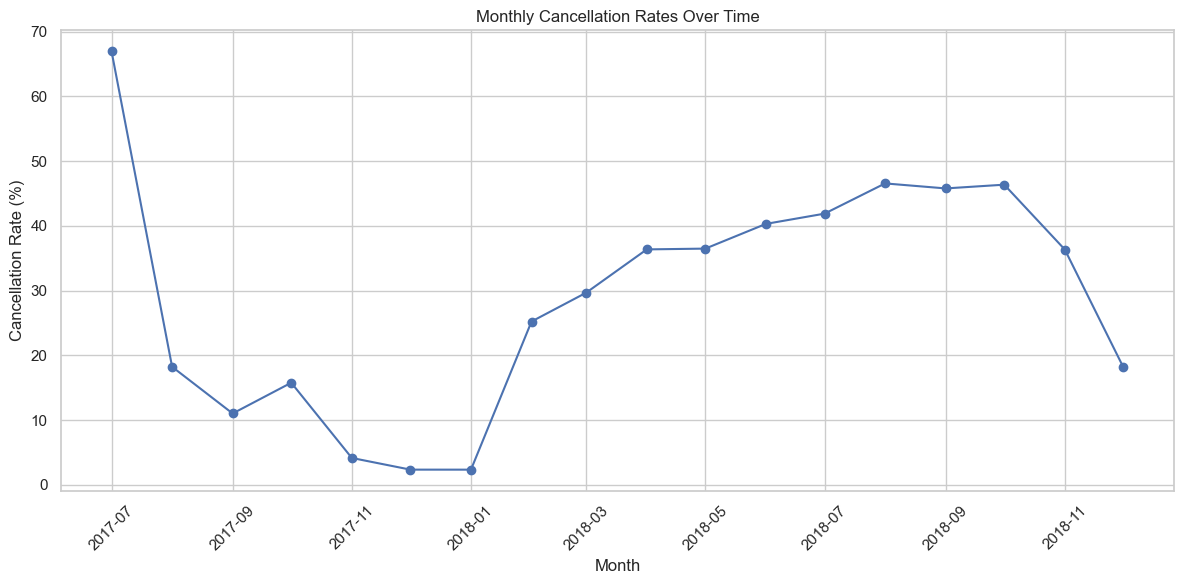

In [201]:
df['arrival_date'] = pd.to_datetime(df['arrival_year'].astype(str) + '-' + df['arrival_month'].astype(str))

monthly_data = df.groupby(df['arrival_date'].dt.to_period('M')).agg(
    total_bookings=('Booking_ID', 'count'),
    cancellations=('booking_status', lambda x: (x == 'Canceled').sum())
)
monthly_data['cancellation_rate'] = (monthly_data['cancellations'] / monthly_data['total_bookings']) * 100

plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index.to_timestamp(), monthly_data['cancellation_rate'], marker='o', linestyle='-')
plt.title('Monthly Cancellation Rates Over Time')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

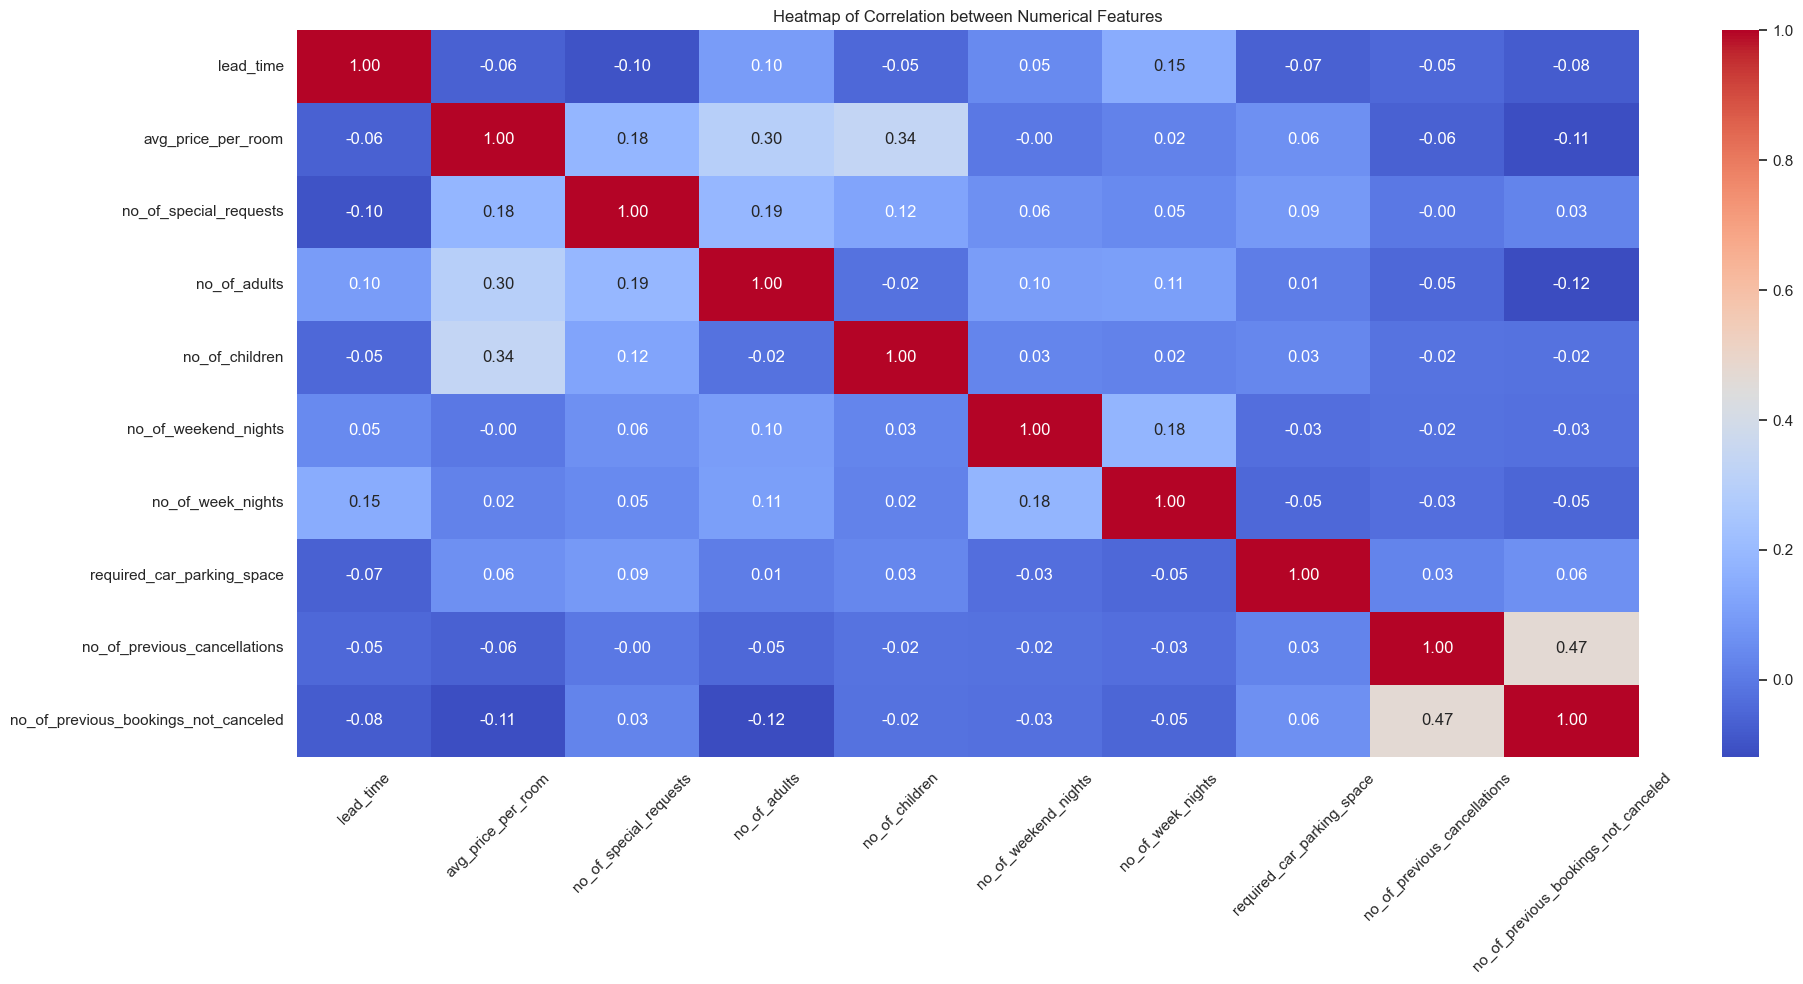

In [202]:
numerical_features = ['lead_time', 'avg_price_per_room', 'no_of_special_requests', 'no_of_adults', 'no_of_children',
                      'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 
                      'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']

correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation between Numerical Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


### Hypothesis Testing

### Test 1

In [203]:
df=pd.read_csv('INNHotelsGroup.csv')

In [204]:
weekend_weekday_df=df[['no_of_weekend_nights','no_of_week_nights','booking_status']].copy()
weekend_weekday_df

no_of_weekend_nights  no_of_week_nights booking_status
0                         1                  2   Not_Canceled
1                         2                  3   Not_Canceled
2                         2                  1       Canceled
3                         0                  2       Canceled
4                         1                  1       Canceled
...                     ...                ...            ...
36270                     2                  6   Not_Canceled
36271                     1                  3       Canceled
36272                     2                  6   Not_Canceled
36273                     0                  3       Canceled
36274                     1                  2   Not_Canceled

[36275 rows x 3 columns]

In [205]:
contingency_table=weekend_weekday_df.groupby('booking_status').sum()
contingency_table

no_of_weekend_nights  no_of_week_nights
booking_status                                         
Canceled                       10548              28432
Not_Canceled                   18861              51529

In [206]:
h0='We fail to reject the Null hypothesis. There is no difference between the type of nights booked and booking status'
h1='We reject the Null hypothesis. There is an association between the type of night booked and booking status'

In [207]:
# Manual Calculation

alpha=0.05
total_observations=sum(weekend_weekday_df['no_of_weekend_nights']) + sum(weekend_weekday_df['no_of_week_nights'])
expected_cancelled_weekend=(contingency_table.sum(axis=1)['Canceled']*contingency_table['no_of_weekend_nights'].sum())/total_observations
expected_cancelled_week=(contingency_table.sum(axis=1)['Canceled']*contingency_table['no_of_week_nights'].sum())/total_observations
expected_notcancelled_weekend=(contingency_table.sum(axis=1)['Not_Canceled']*contingency_table['no_of_weekend_nights'].sum())/total_observations
expected_notcancelled_week=(contingency_table.sum(axis=1)['Not_Canceled']*contingency_table['no_of_week_nights'].sum())/total_observations
expected_list=[expected_cancelled_weekend,expected_cancelled_week,
               expected_notcancelled_weekend,expected_notcancelled_week]
expected_i=0
chi_sqr=0
for i in range(len(contingency_table)):
    for j in range(len(contingency_table)):
        observed=contingency_table.values[i][j]
        expected=expected_list[expected_i]
        chi_sqr=chi_sqr+((observed-expected)**2/expected)
        expected_i+=1
dof=(contingency_table.shape[0]-1)*(contingency_table.shape[0]-1)

p_value = 1 - stats.chi2.cdf(chi_sqr, dof)

if(alpha < p_value):
    print(h0)
else:
    print(h1)

We fail to reject the Null hypothesis. There is no difference between the type of nights booked and booking status


In [208]:
# Using Library
alpha=0.05
observed = contingency_table.values

chi2, p_value, dof, expected = chi2_contingency(observed)
if(alpha < p_value):
    print(h0)
else:
    print(h1)

We fail to reject the Null hypothesis. There is no difference between the type of nights booked and booking status


### Test 2

In [209]:
df=pd.read_csv('INNHotelsGroup.csv')

In [210]:
h0='We fail to reject the null hypothesis. There is no difference in cancellation rates between short stays (1-2 nights) and longer stays (3+ nights).'
h1='We reject the Null hypothesis. There is a significant difference in cancellation rates between short stays (1-2 nights) and longer stays (3+ nights)'

In [211]:
weekend_weekday_df['total_nights']=weekend_weekday_df['no_of_weekend_nights']+weekend_weekday_df['no_of_week_nights']
weekend_weekday_df['short_long']=np.where(weekend_weekday_df['total_nights']<3,'Short','Long')
weekend_weekday_df=weekend_weekday_df[['booking_status','short_long']].copy()
weekend_weekday_df

booking_status short_long
0       Not_Canceled       Long
1       Not_Canceled       Long
2           Canceled       Long
3           Canceled      Short
4           Canceled      Short
...              ...        ...
36270   Not_Canceled       Long
36271       Canceled       Long
36272   Not_Canceled       Long
36273       Canceled       Long
36274   Not_Canceled       Long

[36275 rows x 2 columns]

In [212]:
# contingency_table = pd.crosstab(weekend_weekday_df['short_long'], weekend_weekday_df['booking_status'])
contingency_table=weekend_weekday_df.groupby(['short_long','booking_status']).size().unstack(fill_value=0).copy()
contingency_table

booking_status  Canceled  Not_Canceled
short_long                            
Long                7518         13603
Short               4367         10787

In [213]:
# Manual Calculation
alpha=0.05
total_sum=contingency_table['Canceled'].sum()+contingency_table['Not_Canceled'].sum()
total_cancelled=contingency_table['Canceled'].sum()
total_Not_Canceled=contingency_table['Not_Canceled'].sum()
tot_long=contingency_table.sum(axis=1)['Long']
tot_short=contingency_table.sum(axis=1)['Short']

expected_long_cancelled=(tot_long*total_cancelled)/total_sum
expected_long_not_cancelled=(tot_long*total_Not_Canceled)/total_sum
expected_short_cancelled=(tot_short*total_cancelled)/total_sum
expected_short_not_cancelled=(tot_short*total_Not_Canceled)/total_sum

expected_list=[expected_long_cancelled,expected_long_not_cancelled,expected_short_cancelled,expected_short_not_cancelled]

expected_i=0
chi_sqr=0
for i in range(len(contingency_table)):
    for j in range(len(contingency_table)):
        observed=contingency_table.values[i][j]
        expected=expected_list[expected_i]
        chi_sqr=chi_sqr+((observed-expected)**2/expected)
        expected_i+=1

dof=(contigency_table.shape[0]-1)*(contigency_table.shape[0]-1)
p_value = 1 - stats.chi2.cdf(chi_sqr.round(0), dof)

if(alpha < p_value):
    print(h0)
else:
    print(h1)

We reject the Null hypothesis. There is a significant difference in cancellation rates between short stays (1-2 nights) and longer stays (3+ nights)


### Test 3

In [214]:
df=pd.read_csv('INNHotelsGroup.csv')

In [215]:
h0='We fail to reject the Null hypothesis. There is no association between the booking method and booking status'
h1='We reject the Null hypothesis. There is an association between the booking method and booking status'

In [216]:
filtered_df = df[df['market_segment_type'].isin(['Online', 'Offline'])]
contingency_table = pd.crosstab(filtered_df['booking_status'], filtered_df['market_segment_type'])
alpha = 0.05

observed = contingency_table.values


total = observed.sum()
row_sums = observed.sum(axis=1)
column_sums = observed.sum(axis=0)

expected = np.outer(row_sums, column_sums) / total

chi_squared_stat = 0
for i in range(len(observed)):
    for j in range(len(observed[0])):
        chi_squared_stat += (observed[i][j] - expected[i][j])**2 / expected[i][j]

dof=(contingency_table.shape[0]-1)*(contingency_table.shape[0]-1)


p_value_manual = 1 - stats.chi2.cdf(chi_squared_stat, dof)
if alpha < p_value_manual:
    print(h0)
else:
    print(h1)


We reject the Null hypothesis. There is an association between the booking method and booking status


In [217]:
alpha=0.05
observed = contingency_table.values

chi2, p_value, dof, expected = chi2_contingency(observed)
if(alpha < p_value):
    print(h0)
else:
    print(h1)

We reject the Null hypothesis. There is an association between the booking method and booking status


### Test 4

In [218]:
df=pd.read_csv('INNHotelsGroup.csv')

In [219]:
h0='We fail to reject the Null hypothesis. The closeness of the booking to the actual arrival date does not affect the booking status.'
h1='We reject the Null hypothesis. Bookings made closer to the arrival date are less likely to be canceled.'

In [220]:
bins = [0, 7, 30, df['lead_time'].max()]  
# Short: 0-7 days, Medium: 8-30 days, Long: 31+ days
labels = ['Short', 'Medium', 'Long']
df['arrival_proximity'] = pd.cut(df['lead_time'], bins=bins, labels=labels, include_lowest=True)
contingency_table = pd.crosstab(df['arrival_proximity'], df['booking_status'])

In [221]:
alpha = 0.0025

observed = contingency_table.values
total_observations = observed.sum()

row_sums = observed.sum(axis=1)
column_sums = observed.sum(axis=0)

expected = []
for i in range(len(row_sums)):
    row_expected = []
    for j in range(len(column_sums)):
        e = (row_sums[i] * column_sums[j]) / total_observations
        row_expected.append(e)
    expected.append(row_expected)

expected = np.array(expected)  

chi_sqr = 0
for i in range(len(observed)):
    for j in range(len(observed[0])):
        chi_sqr += ((observed[i][j] - expected[i][j]) ** 2) / expected[i][j]

dof = (len(row_sums) - 1) * (len(column_sums) - 1)

p_value = 1 - stats.chi2.cdf(chi_sqr, dof)

if p_value >= alpha:
    print(h0)
else:
    print(h1)


We reject the Null hypothesis. Bookings made closer to the arrival date are less likely to be canceled.


In [222]:
observed = contingency_table.values
chi2, p_value, dof, expected = chi2_contingency(observed)

if(alpha < p_value):
    print(h0)
else:
    print(h1)

We reject the Null hypothesis. Bookings made closer to the arrival date are less likely to be canceled.


### Test 5

In [229]:
df=pd.read_csv('INNHotelsGroup.csv')

In [230]:
h0 = 'We fail to reject the Null hypothesis. The average number of adults per booking does not differ significantly between weekdays and weekends.'
h1 = 'We reject the Null hypothesis. The average number of adults per booking differs significantly between weekdays and weekends.'

In [231]:
np.random.seed(0)
df['is_weekend'] = np.random.choice([True, False], size=len(df))

weekend_adults = df[df['is_weekend']]['no_of_adults']
weekday_adults = df[~df['is_weekend']]['no_of_adults']

observed_diff = weekend_adults.mean() - weekday_adults.mean()

bootstrap_samples = 10000
manual_diffs = []

for _ in range(bootstrap_samples):
    sample_weekend = np.random.choice(weekend_adults, size=len(weekend_adults), replace=True)
    sample_weekday = np.random.choice(weekday_adults, size=len(weekday_adults), replace=True)
    manual_diffs.append(sample_weekend.mean() - sample_weekday.mean())

p_value_manual = np.sum(np.array(manual_diffs) >= np.abs(observed_diff)) / bootstrap_samples

alpha = 0.05

print('Manual Bootstrapping:')
print('Observed difference in mean number of adults:', observed_diff)
print('P-value:', p_value_manual)
print(h1 if p_value_manual < alpha else h0)


Manual Bootstrapping:
Observed difference in mean number of adults: -0.001515559246922038
P-value: 0.28
We fail to reject the Null hypothesis. The average number of adults per booking does not differ significantly between weekdays and weekends.


In [234]:
bootstrap_samples = 10000
sklearn_diffs = []
for _ in range(bootstrap_samples):
    boot_weekend = resample(weekend_adults)
    boot_weekday = resample(weekday_adults)
    sklearn_diffs.append(boot_weekend.mean() - boot_weekday.mean())
p_value_sklearn = np.sum(np.abs(sklearn_diffs) >= np.abs(observed_diff)) / bootstrap_samples
alpha = 0.05

print('Inbuilt Bootstrapping (sklearn):')
print('P-value:', p_value_sklearn)
print(h1 if p_value_sklearn < alpha else h0)


Inbuilt Bootstrapping (sklearn):
P-value: 0.7841
We fail to reject the Null hypothesis. The average number of adults per booking does not differ significantly between weekdays and weekends.


### Feature Engineering for Binary Classification

In [235]:
df=pd.read_csv('INNHotelsGroup.csv')

In [236]:
# Figuring out what columns among the non numeric are to be dropped
for cols in df.columns:
    if(df[cols].dtypes=='O'):
        print("Columns",cols,'has',df[cols].unique().size,'records')

Columns Booking_ID has 36275 records
Columns type_of_meal_plan has 4 records
Columns room_type_reserved has 7 records
Columns market_segment_type has 5 records
Columns booking_status has 2 records


In [237]:
"""
Arrival date,month and year will be converted to seasons. Since the INN Hotel Groups are based out of the United Kingdom.
I have webscraped to find out the exact seasonal trend of the country.
"""
url = "https://www.npl.co.uk/resources/q-a/when-do-the-four-seasons-begin"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
div_content = soup.find('div', class_='col-12 col-lg-10')
table=div_content.find('table')
rows = table.find_all('tr')
season_timelines=[]
month_encoded={
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}
for row in rows[1:]:
    cells = row.find_all(['td', 'th'])
    season_timelines.append([cell.get_text(strip=True) for cell in cells][0].split('at')[0].strip('\xa0'))
encoded_months = [int(month_encoded[date.split()[0]]) for date in season_timelines]
dates=[int(date.split()[1]) for date in season_timelines]

In [238]:
def find_season(arrival_month,arrival_date):
    if((arrival_month==encoded_months[0] and arrival_date>=dates[0]) or 
       (arrival_month>encoded_months[0] and arrival_month<encoded_months[1]) or 
       (arrival_month==encoded_months[1] and arrival_date<dates[1])):
        return 'spring'
    elif((arrival_month==encoded_months[1] and arrival_date>=dates[1]) or 
       (arrival_month>encoded_months[1] and arrival_month<encoded_months[2]) or 
       (arrival_month==encoded_months[2] and arrival_date<dates[2])):
        return 'summer'
    elif((arrival_month==encoded_months[2] and arrival_date>=dates[2]) or 
       (arrival_month>encoded_months[2] and arrival_month<encoded_months[3]) or 
       (arrival_month==encoded_months[3] and arrival_date<dates[3])):
        return 'autumn'
    else:
        return 'winter'
df['season'] = df.apply(lambda row: find_season(row['arrival_month'], row['arrival_date']), axis=1)

In [239]:
df.drop(['Booking_ID','arrival_year','arrival_month','arrival_date'],axis=1,inplace=True)

In [240]:
# One hot encoding all the categorical variables and converting the target variable to 1 - Cancelled and 0 - Not Cancelled
cat_variables=['type_of_meal_plan','room_type_reserved','market_segment_type','season']
df=pd.get_dummies(df, columns=cat_variables, drop_first=True,dtype='int')
df['booking_status']=np.where(df['booking_status']=='Canceled',1,0)

### Logistic Regression

In [241]:
y = df['booking_status']
X = df.drop('booking_status',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8,stratify=y)

In [242]:
# Feature Scaling
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [243]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [244]:
y_pred=lr.predict(X_test)
y_scores = lr.predict_proba(X_test)[:, 1]

In [142]:

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      4878
           1       0.76      0.63      0.69      2377

    accuracy                           0.81      7255
   macro avg       0.80      0.77      0.78      7255
weighted avg       0.81      0.81      0.81      7255



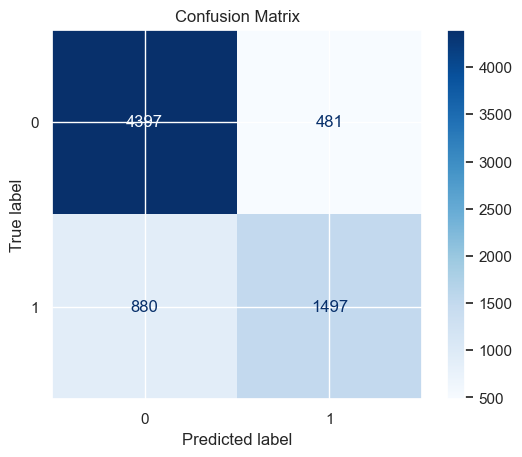

In [143]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

AUC-ROC Score: 0.8705979108592097


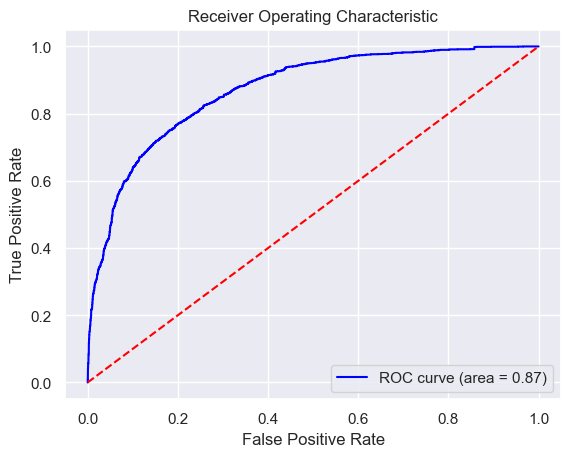

In [144]:
auc_score = roc_auc_score(y_test, y_scores)
print("AUC-ROC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Decision Tree

In [245]:
y = df['booking_status']
X = df.drop('booking_status',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8,stratify=y)

In [246]:
# Feature Scaling
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [247]:
dt_model = DecisionTreeClassifier()

In [248]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [249]:
y_predicted = dt_model.predict(X_test)
y_scores = dt_model.predict_proba(X_test)[:,1]

In [150]:
print("Classification Report: ")
print(classification_report(y_test,y_predicted))

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4878
           1       0.79      0.79      0.79      2377

    accuracy                           0.86      7255
   macro avg       0.84      0.84      0.84      7255
weighted avg       0.86      0.86      0.86      7255



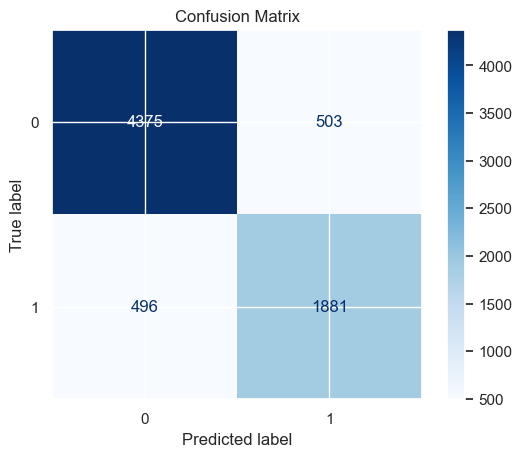

In [151]:
conf_matrix = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

AUC-ROC Score: 0.8470808898244641


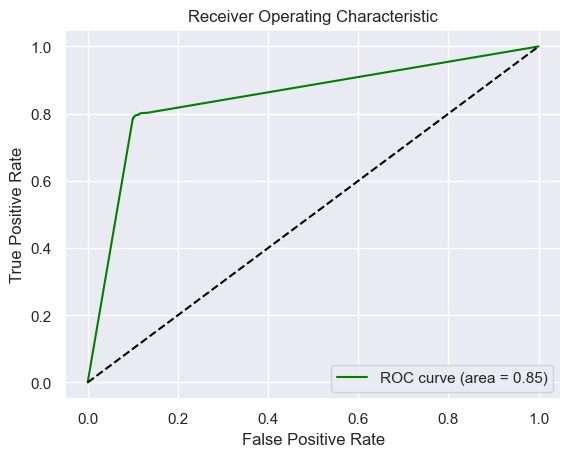

In [152]:
auc_score = roc_auc_score(y_test, y_scores)
print("AUC-ROC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.figure()
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Naive Bayes

In [250]:
target = df['booking_status']
features = df.drop('booking_status', axis=1)

categorical_features = features.select_dtypes(include=['object']).columns
features_encoded = pd.get_dummies(features, columns=categorical_features)

X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42,stratify=target)


In [251]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_probs = mnb.predict_proba(X_test)[:, 1]
mnb_accuracy = accuracy_score(y_test, mnb.predict(X_test))
y_predicted_mnb = mnb.predict(X_test)
mnb_auc = roc_auc_score(y_test, mnb_probs)
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, mnb_probs)
X_train_bern = (X_train > 0).astype(int)
X_test_bern = (X_test > 0).astype(int)

bnb = BernoulliNB()
bnb.fit(X_train_bern, y_train)
y_predicted_bnb = bnb.predict(X_test)
bnb_probs = bnb.predict_proba(X_test_bern)[:, 1]
bnb_accuracy = accuracy_score(y_test, bnb.predict(X_test_bern))
bnb_auc = roc_auc_score(y_test, bnb_probs)
fpr_bnb, tpr_bnb, _ = roc_curve(y_test, bnb_probs)

print(f"Multinomial Naive Bayes - Accuracy: {mnb_accuracy*100:.2f}%, AUC Score: {mnb_auc:.4f}")
print(f"Bernoulli Naive Bayes - Accuracy: {bnb_accuracy*100:.2f}%, AUC Score: {bnb_auc:.4f}")

Multinomial Naive Bayes - Accuracy: 70.02%, AUC Score: 0.7161
Bernoulli Naive Bayes - Accuracy: 73.47%, AUC Score: 0.7483


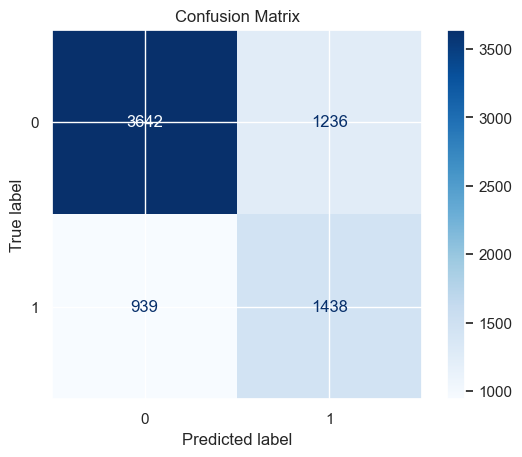

In [163]:
conf_matrix = confusion_matrix(y_test, y_predicted_mnb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

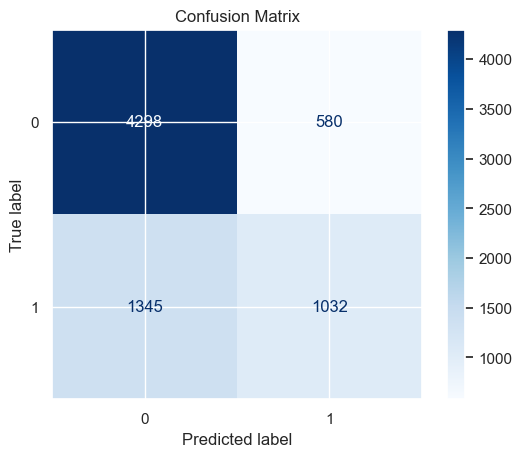

In [164]:
conf_matrix = confusion_matrix(y_test, y_predicted_bnb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

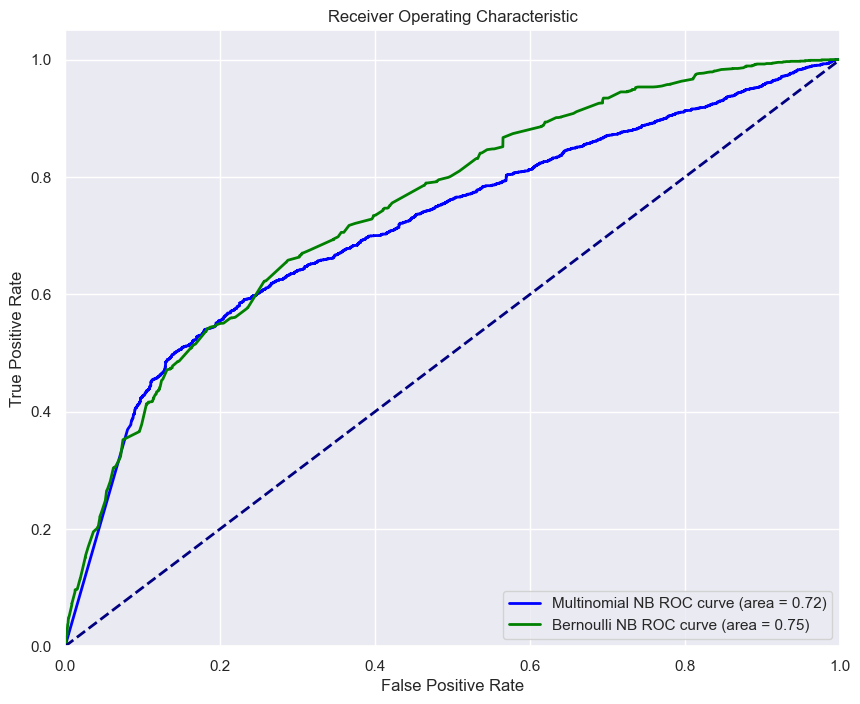

In [165]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_mnb, tpr_mnb, color='blue', lw=2, label=f'Multinomial NB ROC curve (area = {mnb_auc:.2f})')
plt.plot(fpr_bnb, tpr_bnb, color='green', lw=2, label=f'Bernoulli NB ROC curve (area = {bnb_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()